# Dictionaries and Sets

# Using dictionaries

Dictionaries are common and useful in Python for organizing stored data.  They let you look up a value using a string instead of a number.  The string you use to look up the item is called a **key**, and the value retreived is called the **value**.



In the following example, we create an array of prices for some foods at a restaurant, and then look up the value for the salmon.

In [1]:
my_menu_dict = {
    "Salmon": 25,
    "Steak": 30,
    "Mac and cheese" : 18
}

print(my_menu_dict["Salmon"])

25


We could instead initialize an empty dictionary and then insert the key-value pairs.  That would look like this:

In [2]:
my_menu_dict = {} # empty dictionary
my_menu_dict["Salmon"] = 25
my_menu_dict["Steak"] = 30
my_menu_dict["Mac and cheese"] = 18

print(my_menu_dict["Salmon"])

25


Depending on what you're doing, you may want your dictionary to return a default value if the key isn't found; if you don't specify this, you will get a KeyError if you try to look up a key with no stored value.  You do this with the get() method, which takes a key to look up as its first value, and the default value to retrieve as the second value.  This takes the place of looking up the value with square brackets.

In [3]:
my_dict = {}
# print(my_dict['not found'])
my_dict.get('sushi', 0)

0

There are other ways we could store data.  We could, for example, store everything in lists of tuples, and iterate down the list looking for the right menu item.  But, that would be slow if we planned to do a lot of lookups - every one of them would involve a little search for the right word.

Dictionaries are *expected constant time* for lookups, which means that they don't get slower as the number of items stored gets bigger.

*Landing in N'Djili Airport in the Democratic Republic of Congo, Cynthia had little idea of what to expect.  Near the exit, she found someone holding a sign that said "Cynthia."*

<i>"This is for you," said the white-gloved man, handing Cynthia an envelope.  He left.</i>

*Inside the envelope was a short message:  "Hash your full name."  And then, a very strange-looking Python function.*

*Hmm, thought Cynthia.  A hash function is a function that tells things where to go.  So if I run this function on my full name ... it should tell **me** where to go.*

*She got out her laptop.*

# Why hash tables are fast

Dictionaries are fast because they use a technique called *hashing* to ensure they're fast.  A *hash function* is a function specially designed to send data to an address within a range seemingly at random.  The function isn't actually random, which is good, because we'll want to find the data again quickly in the same spot where we left it.  Giving the same argument to the hash function always produces the same arbitrary value.

<img src=" 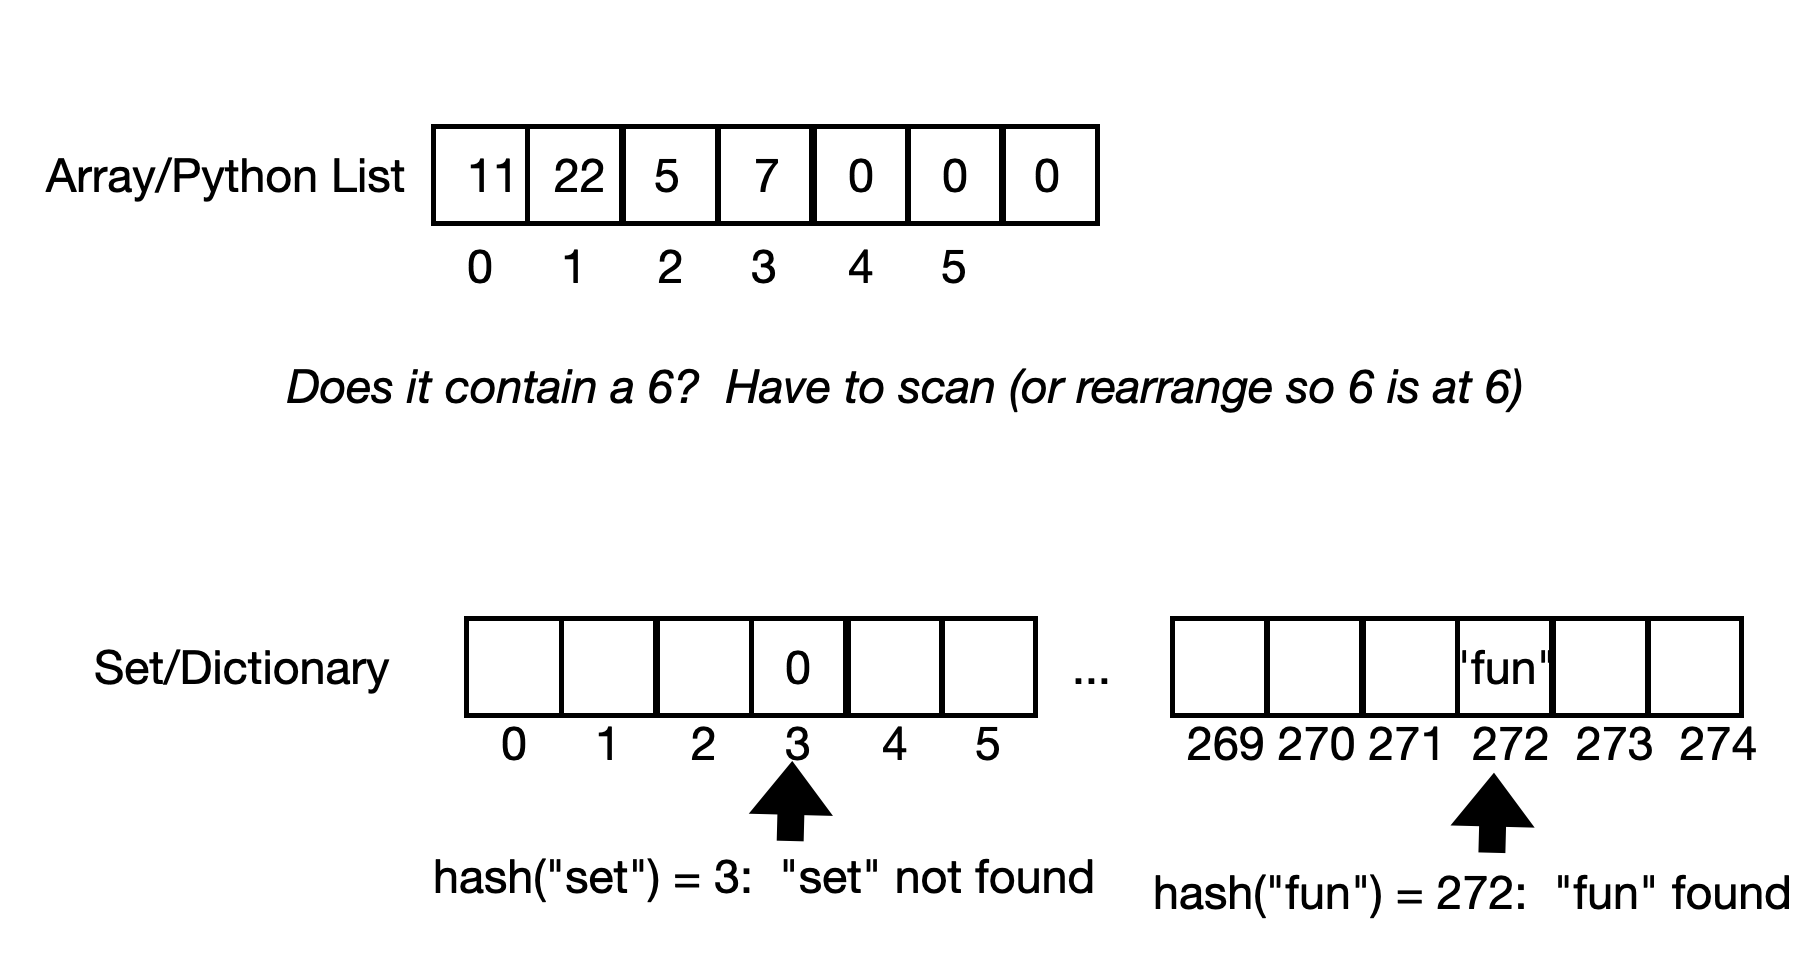">


The hash function is just designed to spread the data evenly over the space allocated to the hash table.  It's deterministic, so the data will be found again in the same place by calling the hash function again.  But it's "pseudorandom," in the sense that it spreads out the data so well and with such apparent unpredictability that we may as well treat the function as producing a random index.



What might this hash function look like?  One approach for a string could be to convert it to a number $M$, then compute $M^n$ % $p$ for some large numbers $p$ and $n$.  It isn't supposed to make sense relative to what the string said; in fact, rather the opposite, because we want it to say very different results for very similar strings, lest we get *collisions* where multiple pieces of data try to go to the same place.


If there *is* a collision - the space is already occupied - Python typically tries again with another, similar hash function.  It can keep doing this with new hash functions until there's an open space or it realizes it's out of space.  The latter doesn't usually happen, but a very full hash table might run more slowly because of collisions.

# Example of dictionary in action

Something that machine learning sometimes wants to do to text is count how many times each word appears in the text.  The frequency of different words can help to tell you who wrote a piece, and what they were feeling at the time.


In [11]:
two_cities = """It was the best of times, it was the worst of times,
 it was the age of wisdom, it was the age of foolishness, it was the epoch of belief,
 it was the epoch of incredulity, it was the season of light, it was the season of darkness,
 it was the spring of hope, it was the winter of despair."""

worddict = {}
# split():  Make a list of the words that were separated by whitespace:
# ['It', 'was', ...]
wordlist = two_cities.split()
print(wordlist)
for word in wordlist:
  if word in worddict:  # Check for presence of key
    worddict[word] += 1
  else:
    worddict[word] = 1

print(worddict["age"])
print(worddict["of"])

['It', 'was', 'the', 'best', 'of', 'times,', 'it', 'was', 'the', 'worst', 'of', 'times,', 'it', 'was', 'the', 'age', 'of', 'wisdom,', 'it', 'was', 'the', 'age', 'of', 'foolishness,', 'it', 'was', 'the', 'epoch', 'of', 'belief,', 'it', 'was', 'the', 'epoch', 'of', 'incredulity,', 'it', 'was', 'the', 'season', 'of', 'light,', 'it', 'was', 'the', 'season', 'of', 'darkness,', 'it', 'was', 'the', 'spring', 'of', 'hope,', 'it', 'was', 'the', 'winter', 'of', 'despair.']
2
10


# Iterating over a dictionary

You can iterate over a dictionary using its items() method to generate key, value pairs.  You can also call individual functions to get just the keys or the just the values; these are keys() and values(), not demonstrated here.

In [12]:
for word, count in worddict.items():
  print(word + ":" + str(count))

It:1
was:10
the:10
best:1
of:10
times,:2
it:9
worst:1
age:2
wisdom,:1
foolishness,:1
epoch:2
belief,:1
incredulity,:1
season:2
light,:1
darkness,:1
spring:1
hope,:1
winter:1
despair.:1


# Exercise (7 min)

The *probability* of a word in a "corpus" of text is {count of word}/{total words}.  Write a function word_prob(word, worddict) that uses the count of the word stored in *worddict* to give a probability of a word.  The probability should be 0 if the word didn't appear.  (Hint:  Sum over all word counts in the dictionary to get the denominator.)

In [23]:
def word_prob(word, worddict):
  #sum(worddict.count())/word.count()
  numerator = worddict.get(word, 0)
  denominator = 0
  for word, count in worddict.items():
    denominator += count
  return numerator / denominator


In [24]:
print(word_prob('winter', worddict))  # Should be 1/60 = 0.0167 or so
print(word_prob('season', worddict))  # Should be 2/60 = 0.0333 or so
print(word_prob('Pokemon', worddict))  # Should be 0 with no errors

0.016666666666666666
0.03333333333333333
0.0


# Sets

Sometimes there are no key-value relationships to remember, just a set of keys.  For example, a set of IP addresses may be banned from connecting to our server.  

This is a good application for sets, which just store keys using hash tables.  As with dictionaries, we could just store the data in lists, but that would be inefficient if we want a quick lookup (there are lots of IP addresses out there).

In [25]:
bigIPs = {"209.85.231.104", "207.46.170.123", "72.30.2.43"}

bigIPs.add("208.80.152.2")
len(bigIPs)

4

In [26]:
newset = set()
newset.add("First item")
print("First item" in newset)

True


# in

Python tries to give some shared functionality across its different container data structures, but the implementation is very different.  "in" works for dictionaries, sets, and lists, returning true if the key or item is present.  But in dictionaries and sets, the actual implementation is a quick hash function, while for lists, the list is scanned for the item.

In [ ]:
# Constructing these ahead of time so we don't confuse
# time to create with time to look up
myset = set(range(123456789))   # {0, 1, 2, ...}
mylist = list(range(123456789)) # [0, 1, 2, ...]

In [ ]:
12345678 in myset  # Fast, uses hash

In [ ]:
12345678 in mylist # Slower, check each item

# SpeedDemo

Here's a demo of the speed difference between searching lists and looking up in dictionaries.  It gets more significant with bigger tables.

In [ ]:
two_cities_extended = """It was the best of times,
it was the worst of times, it was the age of wisdom,
it was the age of foolishness, it was the epoch of belief,
it was the epoch of incredulity, it was the season of Light,
it was the season of Darkness, it was the spring of hope,
it was the winter of despair, we had everything before us,
we had nothing before us, we were all going direct to Heaven,
we were all going direct the other way--in short, the period was
so far like the present period that some of its noisiest authorities
insisted on its being received, for good or for evil, in the superlative
degree of comparison only.

There were a king with a large jaw and a queen with a plain face,
on the throne of England; there were a king with a large jaw and a
queen with a fair face, on the throne of France. In both countries
it was clearer than crystal to the lords of the State preserves of
loaves and fishes, that things in general were settled for ever.

It was the year of Our Lord one thousand seven hundred and seventy-five.
Spiritual revelations were conceded to England at that favoured period,
as at this. Mrs. Southcott had recently attained her five-and-twentieth
blessed birthday, of whom a prophetic private in the Life Guards had heralded
the sublime appearance by announcing that arrangements were made for the
swallowing up of London and Westminster. Even the Cock-lane ghost had been
laid only a round dozen of years, after rapping out its messages, as the
spirits of this very year last past (supernaturally deficient in originality)
rapped out theirs. Mere messages in the earthly order of events had lately
come to the English Crown and People, from a congress of British subjects
in America: which, strange to relate, have proved more important to the human
race than any communications yet received through any of the chickens of the
Cock-lane brood.
"""

# Both pieces of timed code look for every word in their respective data structures

wordlist = two_cities_extended.split()

# Using a list
def find_by_list(wordlist):
  for word in wordlist:
    if word in wordlist:
        continue # Move on to next loop

%time find_by_list(wordlist)


In [ ]:
# Using dictionary
worddict = {}
for word in wordlist:
  if word in worddict:
    worddict[word] += 1
  else:
    worddict[word] = 1

def find_by_dict(wordlist, dict):
  for word in wordlist:
    if word in dict:
      continue # Move on to next iteration of the for loop

%time find_by_dict(wordlist,worddict)

# A note about immutability

Dictionaries and sets can only use **immutable** types as keys.  Immutable types include strings, numbers, and tuples.  But they don't include lists or other dictionaries and sets.

# Exercise (4 min)

Fill in the missing code so that checkletters(myset) returns True if two_cities_extended contains all the lowercase letters in ascii_lowercase, and False otherwise.


In [ ]:
from string import ascii_lowercase
# To iterate through lc letters, "for c in ascii_lowercase"

myset = set()
for i in range(len(two_cities_extended)):
  myset.add(two_cities_extended[i].lower())

def checkletters(myset):
  for c in ascii_lowercase:
    # TODO check whether this letter appeared in myset, maybe return a value
  print("All found")
  return True

checkletters(myset)